<img src="images/pca_banner.png" width="2000"/>

# Principal Component Analysis.
#### This is the first of a series of Jupyter notebooks where we will explore the topic of Principal Component Analysis and establish some broader understanding with respect to Singular Value Decomposition. Instead of starting with the fundamentals, we will begin by approaching the topic from general terminology, observing the computations at work and slowly progressing deeper towards more foundational concepts that lie at the heart of linear algebra, geometry and trigonometry and calculus. My aim is to get you started on using PCA and if you are curious, provide you some deeper understanding of how things work under the hood.

## 1. What is Principal Component Analysis (PCA)?
**A method to summarize datasets.** PCA is a mathematical technique that enables extracting the main features of a dataset thereby reducing its size while preserving the relevant information. This reduction in size is often referred to as **"dimensionality reduction"**.

A useful analogy is to think of a PCA as a method to "summarize" a dataset. A summary is often thought as a very short text that captures the essence of a much larger one. Likewise, the aim of PCA is to "distill" a large dataset into a set of components, called **"principal components"**, or PCs, that preserve the important aspects of the original dataset, and to discard the less relevant ones. Along the lines of our "summary" analogy, each PC works like a sentence in a summary: the more sentences we use (i.e., the more PCs we integrate in our analysis), the higher the detail with which we summarize the original text (i.e. the dataset).

## 2. What is a Principal Component?
It is important to be clear that when we talk of *principal components* we do not refer to a set of specific main features found in the original dataset. Instead, each principal component is an entirely new feature that contains information that is transversal to multiple features present in the original dataset. For example, a dataset may contain features that are redundant or may be highly correlated in which case it can make sense to "summarize" those features into a single new feature: a "principal component".

Yet another way to think of PCs is to think of patterns. A pattern is a repeating element that occurs at a given frequency over some information landscape (text, image, sound... or a dataset). Unique information is contained only in the base element (or "unit cell") of the pattern - patterning is then simply the process of repeating that unique element of information (eventually with some symmetry operations to spice things up). 

## 3. PCA in action
### 3.1 Image compression - Part I.
One popular application of PCA is in image compression. By looking at an image we can better develop intuition with respect to PCA which will be useful once we apply it for the purpose of Data Science.

Let us begin by acknowledging that a 2D image is nothing more, and nothing else, than a matrix. From an informational standpoint, spreadsheet tables filled with numbers along rows and columns are indistinguishable from the 2D images. So, keeping this in mind, we know that we can define a 2D matrix (i.e. an image) as the product of two vectors (*m x n*).

Let's try this:

[[0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0]
 [0 0 0 1 0 0 0]
 [0 0 1 1 1 0 0]
 [0 0 0 1 0 0 0]
 [0 0 1 1 1 0 0]
 [0 0 0 0 0 0 0]]


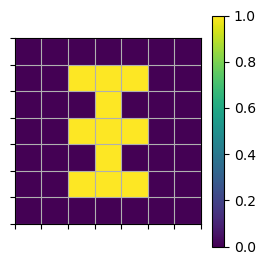

In [3]:
import numpy as np
import matplotlib.pyplot as plt
m1 = np.matrix([[0,0,1,1,1,0,0]]) # row (MATRIX)
n1 = np.matrix([[0],[1],[0],[1],[0],[1],[0]]) # column (Vector)
m2 = np.matrix([[0,0,0,1,0,0,0]]) # row (MATRIX)
n2 = np.matrix([[0],[0],[1],[0],[1],[0],[0]]) # column (Vector)

m1xn1 = np.multiply(m1,n1)
m2xn2 = np.multiply(m2,n2)

mxn = m1xn1 + m2xn2
print(mxn)
plt.figure(figsize=(3, 3))
plt.xticks(np.arange(-0.5,7,1), labels=[])
plt.yticks(np.arange(-0.5,7,1), labels=[])
plt.grid(True, which='major')
plt.imshow(mxn)
plt.colorbar();

In [4]:
mx = np.matrix([
    [0, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 1, 1, 0, 0],
    [0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0],
    [0, 0, 1, 1, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0],
    ])

Let us now also acknowledge that the image above that takes 36 numbers to define, we implemented it using much less information, only 12 numbers (6 from the)

### 3.1 Image compression - Part II
Let's explore this topic by looking at two sets of examples of binary images named "**cross**" and "**robot**". While we work with these images, it is perhaps also useful to keep in mind that images are matrices, and datasets are also matrices. 

The images we will look at are:
- **cross-v1** - a simple image with a cross pattern, and is symmetric about the central vertical and horizontal axes.
- **cross-v2** - developed by breaking one of the axis of symmetry of *cross-v1*, but where symmetry is retained about the central vertical axis.
- **robot-v1** - a more complex image with a face of a robot symmetrical about its central vertical axis.
- **robot-v2** - developed by breaking the only axis of symmetry of *robot-v1* creating an asymmetric image.

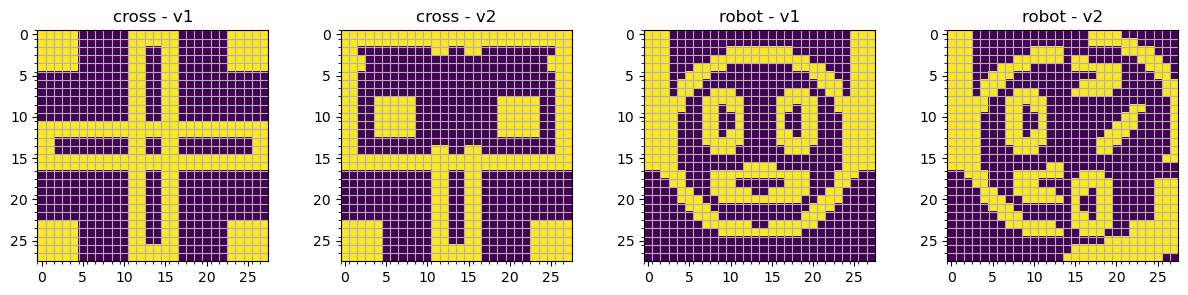

In [5]:
# Display "cross" and "robot" sample images in their -v1 and -v2 variants
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
img_cross1 = io.imread('images/cross_28x28px_bin.png')
img_cross2 = io.imread('images/cross2_28x28px_bin.png')
img_robot1 = io.imread('images/robot_28x28px_bin.png')
img_robot2 = io.imread('images/robot2_28x28px_bin.png')

img_lst = [img_cross1, img_cross2, img_robot1, img_robot2]
legend_lst = ["cross - v1", "cross - v2", "robot - v1", "robot - v2"]

fig, axes = plt.subplots(1,4,figsize=(15,3))
ax = axes.ravel()
plot_lst = [img_cross1, img_cross2, img_robot1, img_robot2]

for i, img in enumerate(img_lst):    
    # Major ticks
    ax[i].set_xticks(np.arange(0, 27, 5))
    ax[i].set_yticks(np.arange(0, 27, 5))
    # Labels for major ticks
    ax[i].set_xticklabels(np.arange(0, 27, 5))
    ax[i].set_yticklabels(np.arange(0, 27, 5))
    # Minor ticks
    ax[i].set_xticks(np.arange(-.5, 27.5, 1), minor=True)
    ax[i].set_yticks(np.arange(-.5, 27.5, 1), minor=True)
    # Set grid
    ax[i].grid(True, which='minor')  
    # Set title  
    ax[i].set_title(legend_lst[i])
    # Plot array
    ax[i].imshow(img)


Before we begin analyzing these images, let's get straight about what they all have in common:

In [6]:
# Shared properties of the images to be analyzed
import sys
from tabulate import tabulate

def image_properties(img_name):
    """collects and displays some properties of the indicated image name.

    Args:
        img_name (numpy.ndarray): 2D image array to for which properties are extracted
    """
    size = img_name.size # total number of pixels
    mem = sys.getsizeof(img_name) # Memory
    shape = img_name.shape # Dimensions
    vals = list(np.unique(img_name, return_counts=True)[0]) # Unique values
    counts = list(np.unique(img_name, return_counts=True)[1]) # Counts of unique values
    
    return [size, shape, vals, counts[0], counts[1], mem]


properties_lst =[]
for i, img in enumerate(img_lst):
    temp_lst = [legend_lst[i]] + image_properties(img)
    properties_lst.append(temp_lst)

headers = ["image", "nr pixels", "matrix size", "unique values", "total 0", "total 1","memory size"]
print(tabulate(properties_lst, headers = headers))
    
    

image         nr pixels  matrix size    unique values      total 0    total 1    memory size
----------  -----------  -------------  ---------------  ---------  ---------  -------------
cross - v1          784  (28, 28)       [0, 1]                 460        324            128
cross - v2          784  (28, 28)       [0, 1]                 460        324            128
robot - v1          784  (28, 28)       [0, 1]                 460        324            128
robot - v2          784  (28, 28)       [0, 1]                 460        324            128


Despite their different look, each image comprises 784 pixels, arranged as a 28x28 matrix, consisting of only of numbers 0 and 1, all with the same amount of zeros (460) and the same amount of ones (324), and for each image the same amount of memory is used: 128 bytes. From this perspective one could argue that all 4 images hold the same amount of information.

**However, these numbers don't tell the whole story.** A key difference between these images in terms of information content is how symmetric the information on display. Whenever information can be described by a pattern repeated multiple times (in other words, information is repeated over and over across the dataset), it offers the possibility to be well summarized by a single principal component. The more repetitive the underlying pattern in an image, the more that full pattern can be summarized. In other words, the more repetitive is the information in a matrix, the smaller the number of principal components required to fully describe it.

Let's then have a look at what happens to the number of PCs required to describe each image:

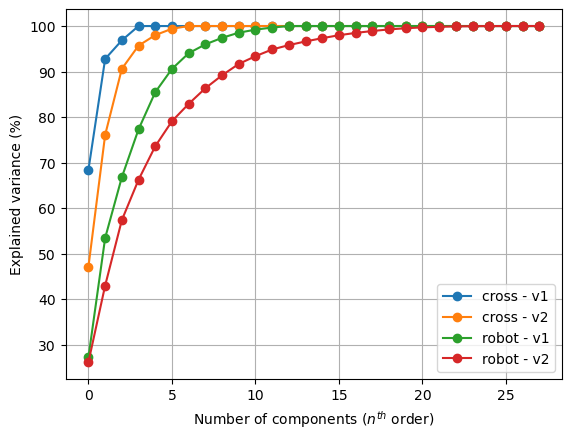

In [7]:
# Display plot with the cummulative sum of the explained varience for each principal component. 
from sklearn.decomposition import PCA
def pca_cumsum (array2d, nr_c):
    """Makes the principal component analysis of a 2D array and returns a vector containing
    the cummulative sum of the explained variance for each principal component.

    Args:
        array2d (numpy.ndarray): 2D array fro which the principal components are calculated
        nr_c (int): number of components
    """
    # Initialize PCA for the desired number of components:
    pca = PCA(n_components = nr_c)
    # fit PCA to data
    pca.fit(array2d)
    # Get the vector with the cummulative sum of the explained varience for each component
    explained_var = np.cumsum(pca.explained_variance_ratio_ * 100)

    return explained_var

plt.grid()

for i, img in enumerate(img_lst):
    pca_line = pca_cumsum(img, 28)
    plt.plot(pca_line, 'o-')

plt.legend(legend_lst)
plt.xlabel('Number of components ($n^{th}$ order)')
plt.ylabel('Explained variance (%)');


In [36]:
pca_cumsum (img_robot1, 4)

array([27.2388491 , 53.42790713, 66.77630046, 77.30374612])

It is clear that with only 4 components we can fully account for 100% of the variance in the **cross - v1** image, but only 95.7% of variance for **cross - v2**. Significantly less variance can be explained with 4 components for the **robot - v1** and **robot - v2** images (77.3% and 66.2%, respectively)

In [8]:
def image_sum_components(img, pc_lst):
    """Visualizes the sum of the principal components for a given image according to the input list
    
    Returns:
        2D array (image) od the last visualized component sum

    Args:
        img (numpy.ndarray): image to be processed by PCA
        pc_lst(list): list of intergers containing the components to be visualized.
    """
    #convert "pc_lst" to a list in case a numpy array was provided
    if isinstance(pc_lst, np.ndarray):  
        pc_lst = pc_lst.tolist()    
    
    #define the number of componnents that can be visualized
    nComp = min(img.shape)
    
    #Make sure the list of components to be visualized is correct
    pc_lst = list(filter(lambda a: a <= nComp, pc_lst))
        
    # Initialize PCA & fit it to the data
    pca = PCA(n_components = nComp)
    pca.fit(img)
    
    # Setup visualization
    nr_cols = 10
    nr_rows = int(np.ceil((len(pc_lst))/nr_cols))
    width = 15
    height = 1.6*nr_rows
    fig, axes = plt.subplots(nr_rows, nr_cols, sharex=True, sharey=True, figsize=(width,height))
    ax = axes.ravel()
    
    # Create an empty array to collect results
    img_mean = np.zeros((img.shape[0],img.shape[1]))
    # Populate the empty matrix with the mean of the input 2D array
    img_mean += np.mean(img, axis=0)
    # Loop through the PC list to visualize them
    for i in range(len(pc_lst)):
        ax[i].set_xticks([])
        ax[i].set_yticks([])
        Xhat = img_mean + np.dot(pca.transform(img)[:,:pc_lst[i]], pca.components_[:pc_lst[i],:])
        ax[i].title.set_text(f"P.C. {pc_lst[i]}")
        
        ax[i].imshow(Xhat, cmap="gray")
           
    return Xhat

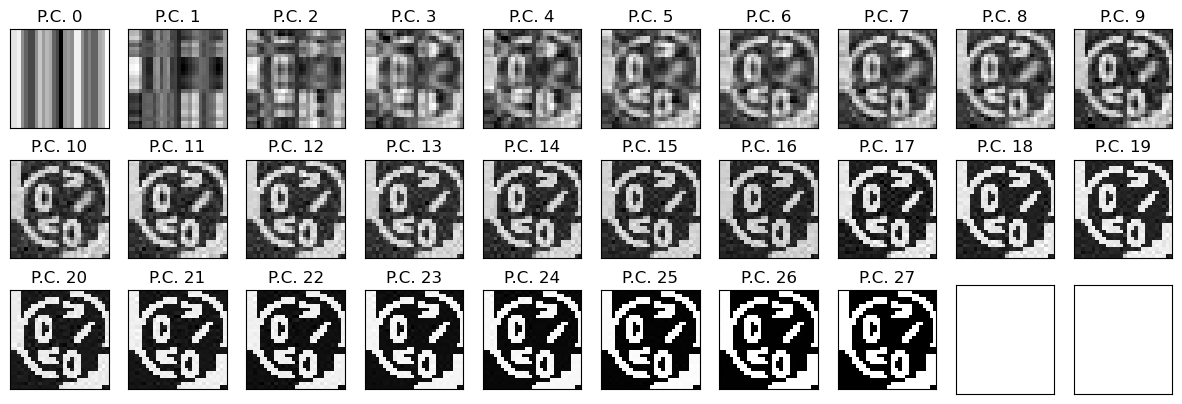

In [14]:
pc_lst = np.arange(0,28,1)
img_pc = image_sum_components(img_robot2,pc_lst)

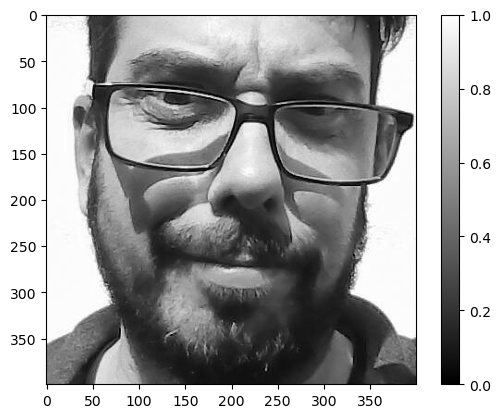

In [10]:
from skimage.color import rgb2gray
#loads image
img_face = io.imread("images/original_image.jpg")
# converts from rgb color space to grayscale
img_face = rgb2gray(img_face)
# defines the pixel lenght and width of the final (square) image
delta = 400
# Crops the image
img_face = img_face[250:250+delta,450:450+delta]
plt.imshow(img_face, cmap="gray")
plt.colorbar()

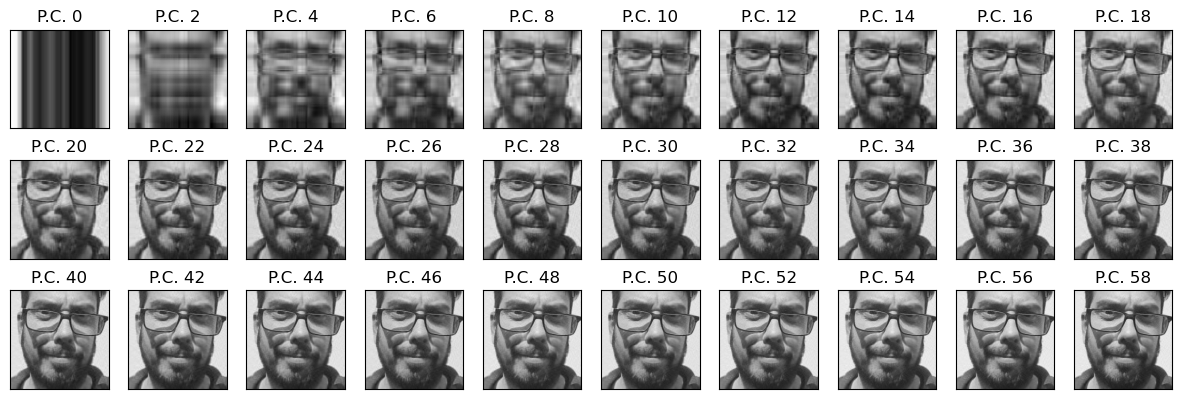

In [37]:
my_lst = np.arange(0,60,2)
img_pc = image_sum_components(img_face,my_lst)

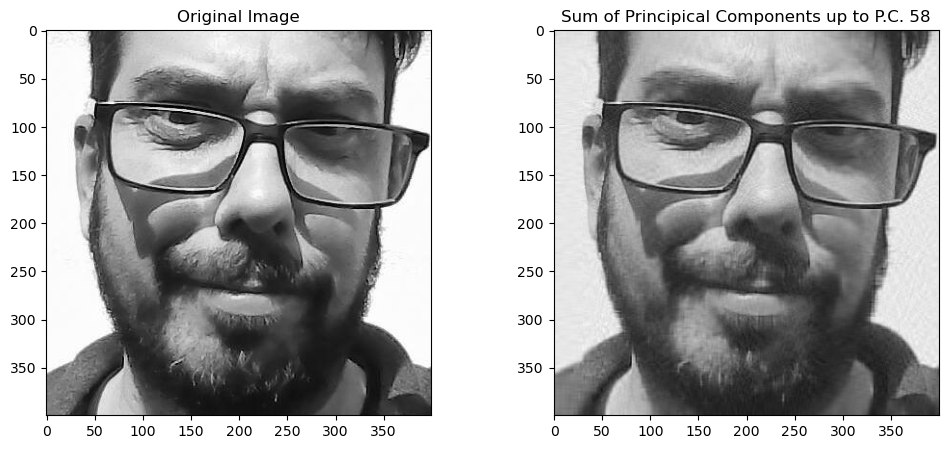

In [38]:
fig, axes = plt.subplots(1,2, figsize=(12,5))
axes[0].imshow(img_face, cmap="gray")
axes[0].title.set_text("Original Image")
axes[1].imshow(img_pc,cmap="gray")
axes[1].title.set_text("Sum of Principical Components up to P.C. 58")

In [39]:
io.imsave("img_face.jpg",img_face)
io.imsave("img_face_pc58.jpg", img_pc)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-0.09037965955353466, 1.1022313179755674]. Convert image to uint8 prior to saving to suppress this warning.


array([[ 0.00000000e+00,  2.20498681e-16, -1.11022302e-16,
        -3.33066907e-16, -5.55111512e-17,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00, -2.44154983e-16,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  9.39360576e-18,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  9.39360576e-18,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  9.39360576e-18,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00, -2.44154983e-16,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  2.20498681e-16, -1.11022302e-16,
        -3.33066907e-16, -5.55111512e-17,  0.00000000e+00,
         0.0000000

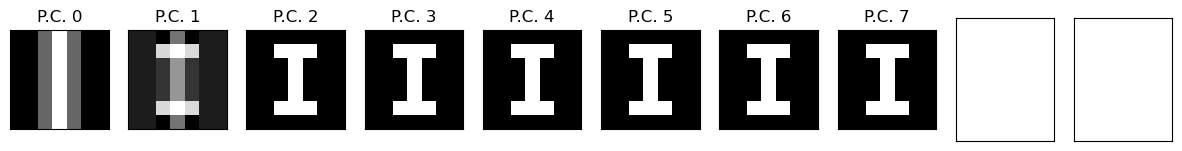

In [12]:
image_sum_components(np.asarray(mx),[0,1,2,3,4,5,6,7,9,10,11,12])

NameError: name 'img_new' is not defined

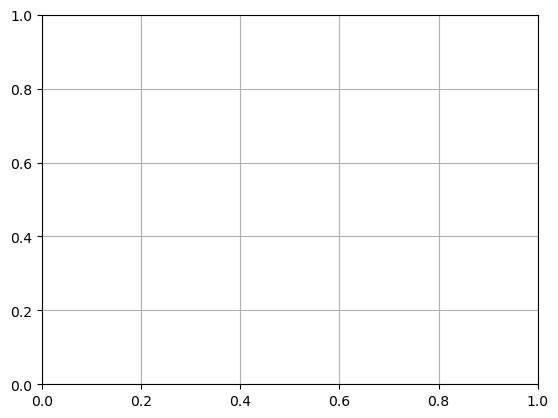

In [13]:
plt.grid()
pca_line = pca_cumsum(img_new, 398)
plt.plot(pca_line, 'o-')
plt.xlabel('Number of components ($n^{th}$ order)')
plt.ylabel('Explained variance (%)');

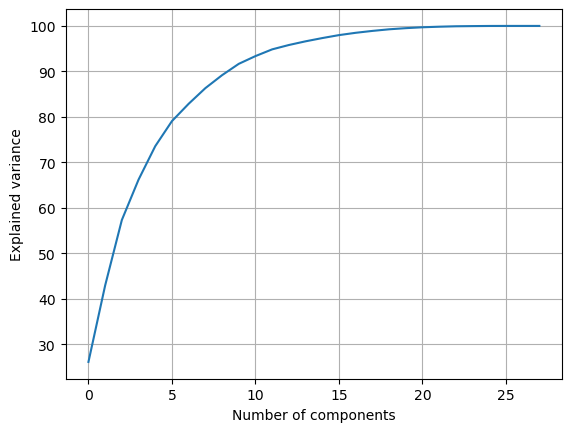

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
pca_28 = PCA(n_components=28)
pca_28.fit(img_robot2)

plt.grid()
plt.plot(np.cumsum(pca_28.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.savefig('Scree plot.png')